<a href="https://colab.research.google.com/github/groom115/Expolatory-Data-analysis-on-Global-Terrorism/blob/main/Expolatory_Data_Analysis_on_Global_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Spark Foundation Task - 4**

#Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
#As a security/defense analyst, try to find out the hot zone of terrorism.
#What all security issues and insights you can derive by EDA?

Author:Abhishek shyam

dataset:https://bit.ly/2TK5Xn5

#**Import library**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings as wg

#**Loading Dataset**

In [17]:
url="https://bit.ly/2TK5Xn5"
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin',low_memory=False)
df.head(20) 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165297 entries, 0 to 165296
Columns: 135 entries, eventid to related
dtypes: float64(62), int64(15), object(58)
memory usage: 170.3+ MB


In [19]:
df.shape

(165297, 135)

In [20]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.652970e+05,165297.000000,165297.000000,165297.000000,165297.000000,165297.000000,165297.000000,160814.000000,1.608130e+05,165291.000000,165297.000000,165297.000000,165297.000000,165297.000000,165296.000000,25719.000000,165296.000000,165297.000000,165297.000000,165297.000000,5358.000000,358.000000,165297.000000,156398.000000,163940.000000,9625.000000,9181.000000,9314.000000,1009.000000,936.000000,981.000000,164917.000000,1481.000000,212.000000,165296.000000,94181.000000,95807.000000,99176.000000,15202.000000,1416.000000,462.000000,210.000000,86.000000,4685.000000,165296.000000,146437.000000,11284.000000,10015.000000,1586.000000,1442.000000,73.000000,70.000000,155936.000000,100857.000000,98795.000000,150416.000000,100603.000000,96732.000000,165296.000000,58745.000000,3.366900e+04,165118.000000,12087.000000,12032.000000,3569.000000,7133.000000,75896.000000,1.254000e+03,4.680000e+02,6.790000e+02,457.000000,9506.000000,8915.000000,165296.000000,165296.000000,165296.000000,165296.000000
mean,2.001313e+11,2001.247923,6.363540,15.463693,0.043104,132.622806,7.050128,23.314729,-5.104525e+02,1.450412,0.067503,0.988403,0.992886,0.880960,-0.594975,1.293946,0.133191,0.898407,0.032771,3.208437,3.636805,5.069832,8.362221,46.827555,127.634317,10.182545,55.007733,131.573653,9.858276,54.981838,136.937819,0.085964,0.258609,0.207547,0.002396,-63.079485,-1.643512,0.018744,7.000658,0.221751,7.391775,0.400000,7.488372,-6.528922,6.421547,11.058421,6.709766,10.670894,6.837327,11.438974,6.246575,10.842857,2.380361,0.052758,0.456410,3.220010,0.043140,0.089774,-0.473726,3.298647,2.401984e+05,0.060230,4.473318,-0.398770,-40.859274,-29.308005,-0.142919,3.393642e+06,6.958930e+05,8.154814e+05,268.466083,4.600147,-27.723724,-4.587389,-4.517508,0.092634,-3.972831
std,1.310554e+09,13.106532,3.380244,8.810947,0.203092,112.848269,2.957509,18.981511,2.149195e+05,1.008429,0.286362,0.107065,0.084047,0.323837,2.560498,0.683984,0.339782,0.302113,0.178038,1.884272,2.227797,2.269796,6.649248,31.124415,87.647905,5.749862,25.872034,126.454868,5.813976,26.729436,150.166687,0.280312,0.438018,0.406511,0.048887,233.183218,13.333531,1.164486,2.617868,1.091040,2.874863,0.491069,2.933555,4.100710,2.145618,6.527404,2.158287,7.541611,2.129562,8.321487,1.507212,8.192672,11.616401,6.125944,4.032593,37.491378,3.293386,1.383299,3.062000,0.490627,1.670520e+07,0.431658,210.876054,7.243837,85.975239,126.409496,1.193526,3.133514e+07,7.759264e+06,1.082766e+07,3198.380824,2.042967,65.514979,4.543182,4.628014,0.590945,4.690756
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,

In [21]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,-0.031594,0.014739,0.091534,-0.142696,0.398760,0.170510,0.003862,0.032475,0.074802,0.000834,0.025866,0.000312,0.285777,0.050199,0.089835,-0.061278,0.136578,0.059356,0.043121,0.139015,0.074434,0.048560,-0.022245,0.099935,0.115472,-0.091030,0.148861,0.081429,-0.006870,0.063052,-0.095224,-0.213253,0.008724,-0.136766,0.466662,0.126786,0.118140,0.018125,0.115831,-0.444640,0.081740,0.313921,-0.027397,0.101995,0.074484,0.036034,0.063577,0.082957,-0.138596,0.027110,0.014675,-0.013600,0.021140,0.017952,-0.029944,0.022671,-0.289321,-0.155860,-0.012544,-0.008869,0.006740,-0.017420,-0.466946,-0.159014,-0.258035,-0.000507,-0.003370,-0.005800,-0.172692,0.276578,-0.190059,-0.171079,-0.162049,-0.078086,-0.202136
iyear,0.999996,1.000000,-0.034180,0.014658,0.091526,-0.142668,0.398774,0.170556,0.003873,0.032462,0.074815,0.000807,0.025865,0.000307,0.285810,0.050233,0.089847,-0.061284,0.136571,0.059343,0.043432,0.139370,0.074445,0.048566,-0.022220,0.099829,0.115375,-0.090953,0.148676,0.081290,-0.006930,0.063043,-0.095196,-0.213008,0.008732,-0.136817,0.466423,0.126675,0.118044,0.018449,0.115680,-0.444733,0.082050,0.313399,-0.027409,0.101987,0.074495,0.036005,0.063617,0.083324,-0.138298,0.026855,0.014666,-0.013620,0.021139,0.017941,-0.029949,0.022665,-0.289318,-0.155864,-0.012536,-0.008898,0.006716,-0.017426,-0.466914,-0.159113,-0.257784,-0.000506,-0.003625,-0.005957,-0.172585,0.276575,-0.189990,-0.171061,-0.162031,-0.078078,-0.202110
imonth,-0.031594,-0.034180,1.000000,0.005612,-0.004223,-0.006360,-0.017175,-0.020248,-0.004164,0.001701,-0.007927,0.001570,-0.000138,0.003799,-0.022433,-0.012644,-0.006737,0.004899,-0.001229,0.001622,-0.057053,-0.079827,-0.007170,-0.003887,-0.007586,0.023804,0.019072,-0.011013,0.035656,0.029068,0.016479,0.001046,0.002087,-0.020704,-0.003110,0.020221,0.020687,0.017343,0.021207,-0.063401,0.011347,0.074570,-0.106499,0.125382,0.004741,-0.001280,-0.011718,0.004232,-0.049968,-0.128610,-0.062079,0.058090,0.003009,0.004622,-0.000489,0.003300,0.001961,0.000465,0.006877,0.002024,-0.002775,0.008909,0.009742,0.002183,0.003652,0.012141,-0.072608,0.002796,0.059178,0.066945,-0.021943,0.001158,-0.010730,-0.004044,-0.004053,-0.001110,-0.006421
iday,0.014739,0.014658,0.005612,1.000000,-0.004530,0.004236,0.008941,0.002821,-0.002411,-0.010215,-0.005440,0.012011,-0.002048,-0.004340,0.001013,-0.008091,-0.002660,-0.007998,0.003155,-0.009430,0.017122,-0.144608,0.000518,-0.002018,0.005233,0.018150,0.021169,-0.020176,-0.052518,-0.038870,-0.039130,-0.002017,0.033316,-0.022067,-0.006132,-0.015243,0.001750,0.003753,0.001042,-0.041387,0.061649,0.187292,0.078396,0.024000,-0.005259,0.007383,0.017837,-0.003270,0.033854,-0.039547,-0.005110,0.073744,-0.004330,-0.002063,-0.003513,-0.000927,0.001603,0.002162,-0.004457,-0.005780,-0.001173,0.005343,-0.020722,-0.002720,-0.033983,0.018048,0.000578,0.014444,-0.009665,0.004658,0.001245,-0.000926,-0.002763,-0.004285,-0.004371,-0.001901,-0.003832
extended,0.091534,0.091526,-0.004223,-0.004530,1.000000,-0.024734,0.035623,-0.020272,0.000534,0.056568,0.017064,-0.016518,0.001308,0.047203,0.010345,0.092370,-0.016305,0.068315,-0.031203,0.271911,-0.008184,-0.069093,0.008463,0.017060,0.013901,-0.032536,-0.014790,0.039912,0.047624,0.040852,0.007281,0.035978,-0.055838,-0.155

In [22]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    158852
               ...  
INT_LOG            1
INT_IDEO           1
INT_MISC           1
INT_ANY            1
related       143276
Length: 135, dtype: int64

In [23]:
# Number of unique values in each columns

for i in df.columns:
    print(i,len(df[i].unique()))

eventid 165297
iyear 46
imonth 13
iday 32
approxdate 1667
extended 2
resolution 1860
country 205
country_txt 205
region 12
region_txt 12
provstate 2779
city 32725
latitude 41464
longitude 41238
specificity 6
vicinity 3
location 38287
summary 96783
crit1 2
crit2 2
crit3 2
doubtterr 4
alternative 6
alternative_txt 6
multiple 3
success 2
suicide 2
attacktype1 9
attacktype1_txt 9
attacktype2 10
attacktype2_txt 10
attacktype3 9
attacktype3_txt 9
targtype1 22
targtype1_txt 22
targsubtype1 113
targsubtype1_txt 113
corp1 30497
target1 81901
natlty1 213
natlty1_txt 213
targtype2 23
targtype2_txt 23
targsubtype2 106
targsubtype2_txt 106
corp2 2429
target2 4705
natlty2 157
natlty2_txt 157
targtype3 21
targtype3_txt 21
targsubtype3 90
targsubtype3_txt 90
corp3 371
target3 652
natlty3 106
natlty3_txt 106
gname 3397
gsubname 1068
gname2 374
gsubname2 51
gname3 90
gsubname3 11
motive 12539
guncertain1 3
guncertain2 3
guncertain3 3
individual 3
nperps 114
nperpcap 51
claimed 4
claimmode 11
claimmode_t

# **Visualisation**

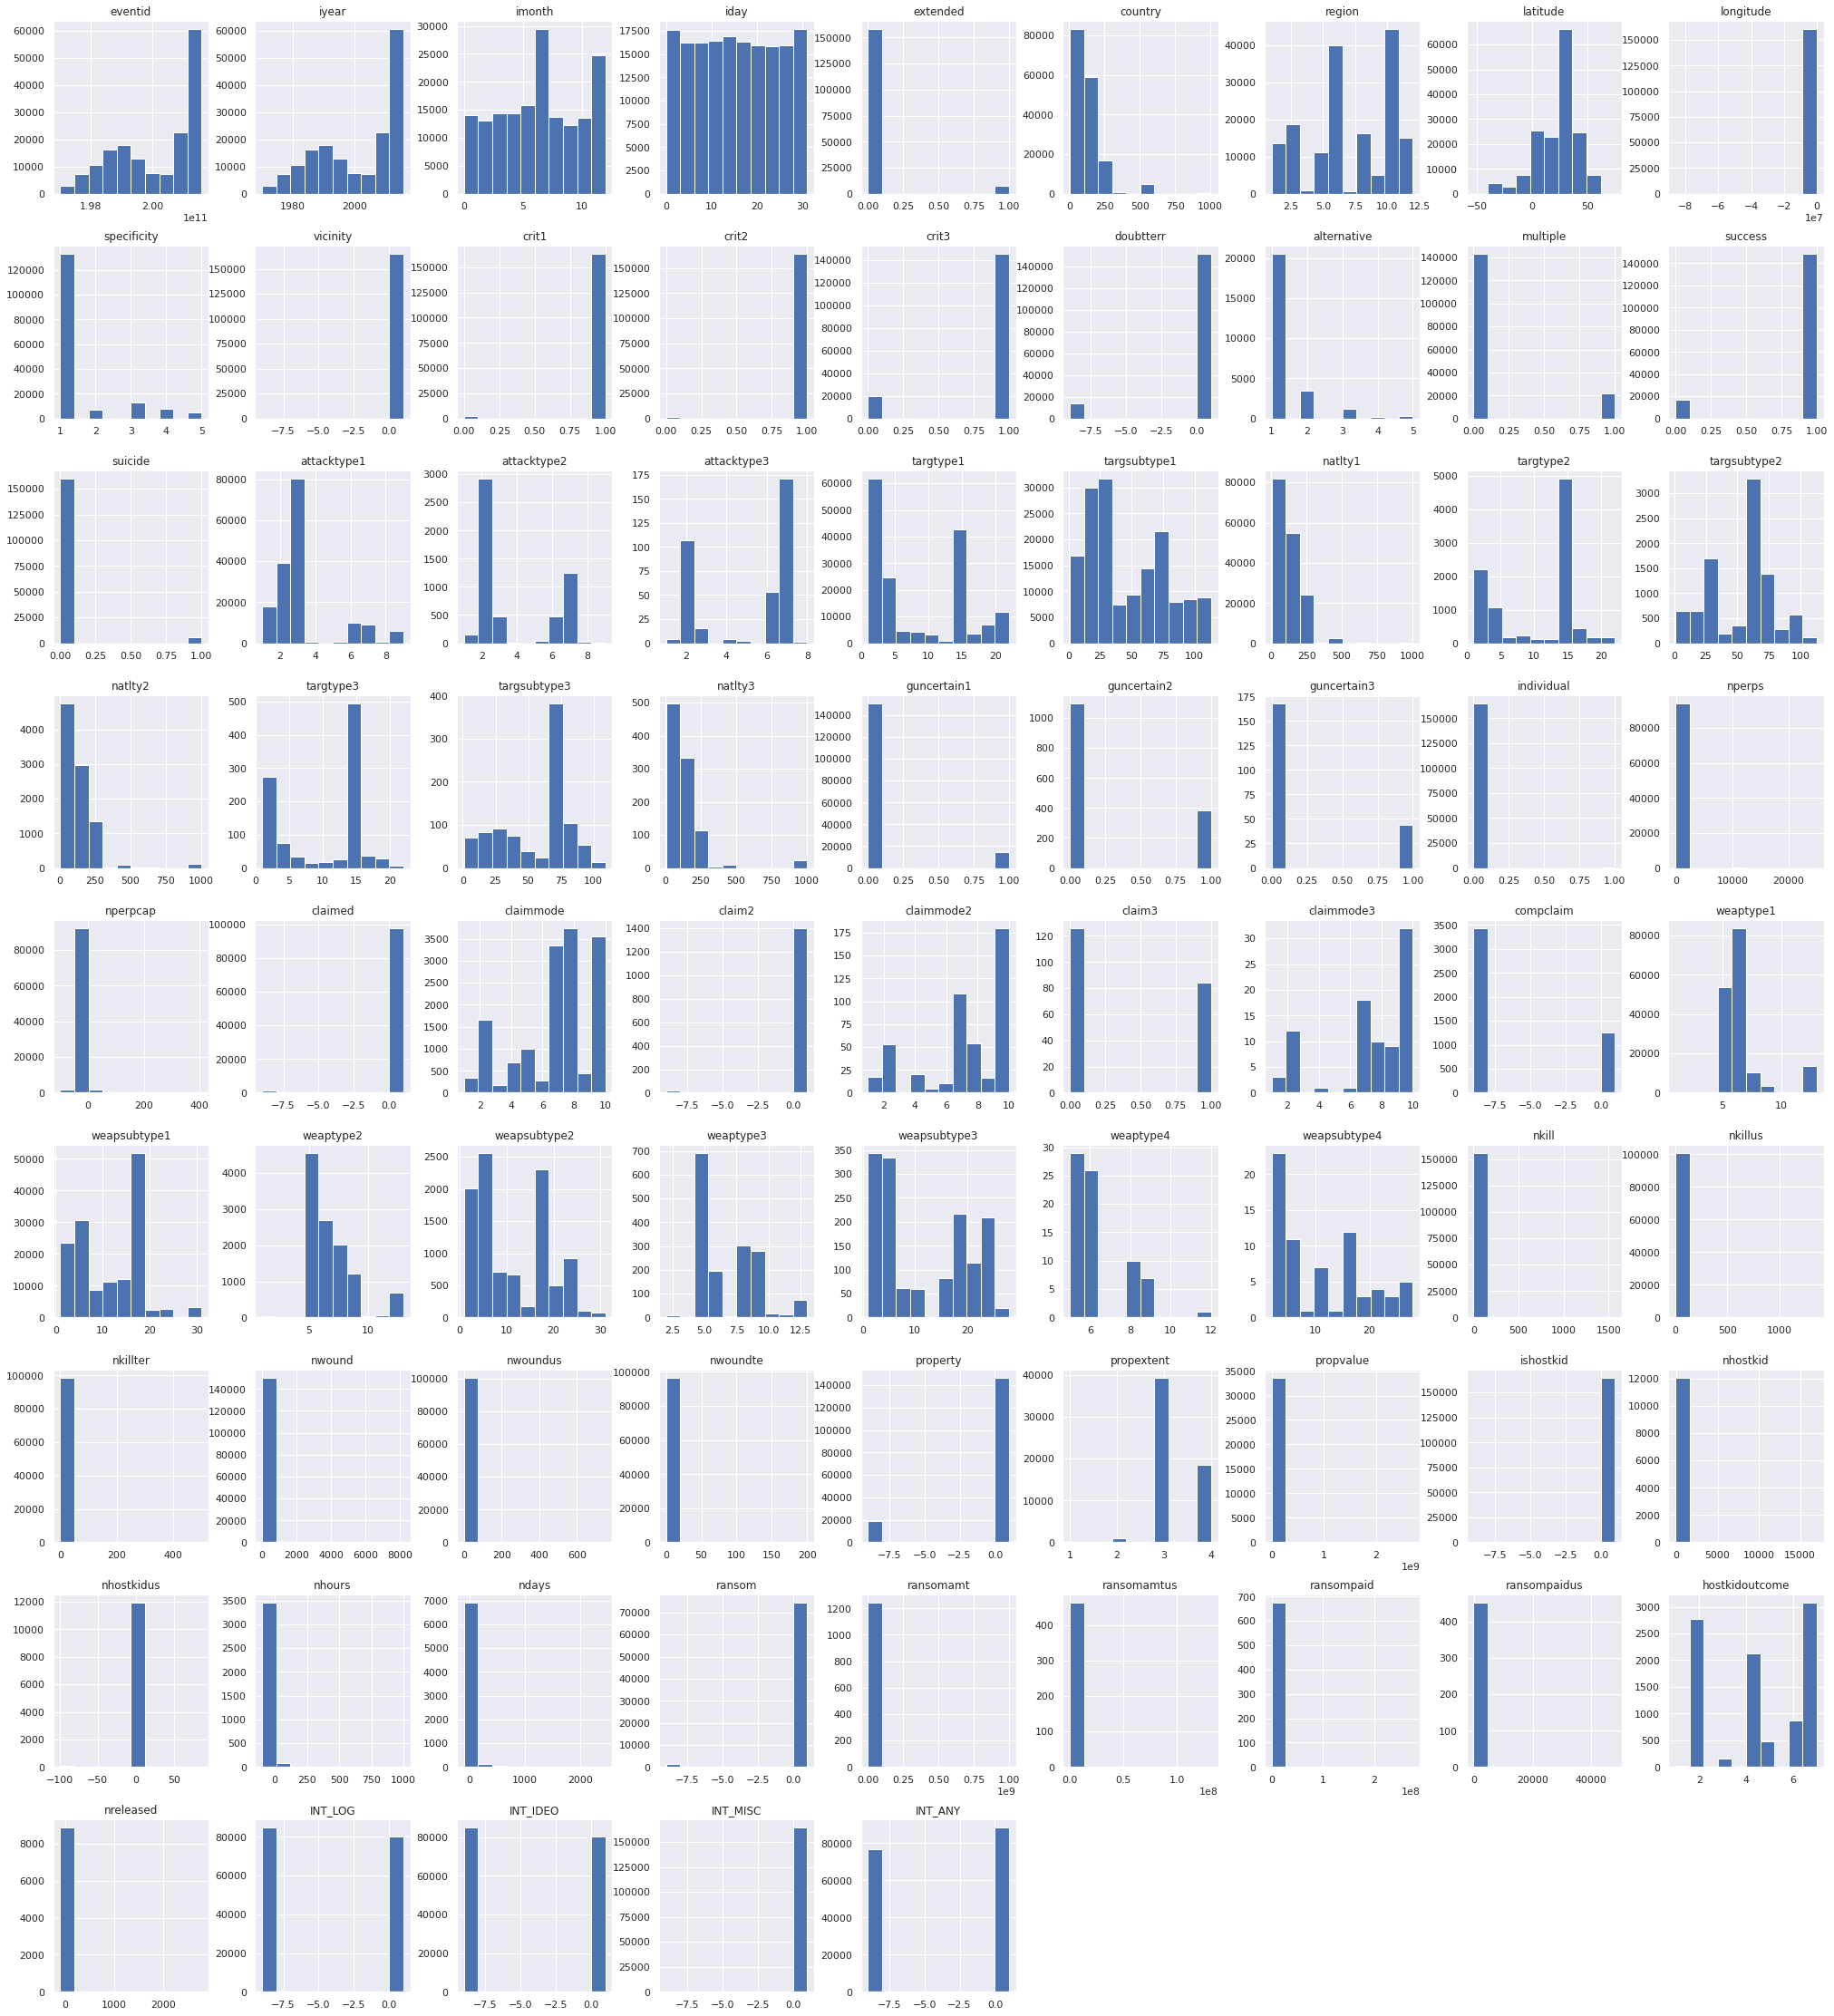

In [24]:

df.hist(figsize=(35,40))
plt.show()

Text(0.5, 1.0, 'Region-wise terrorist activity in each year ')

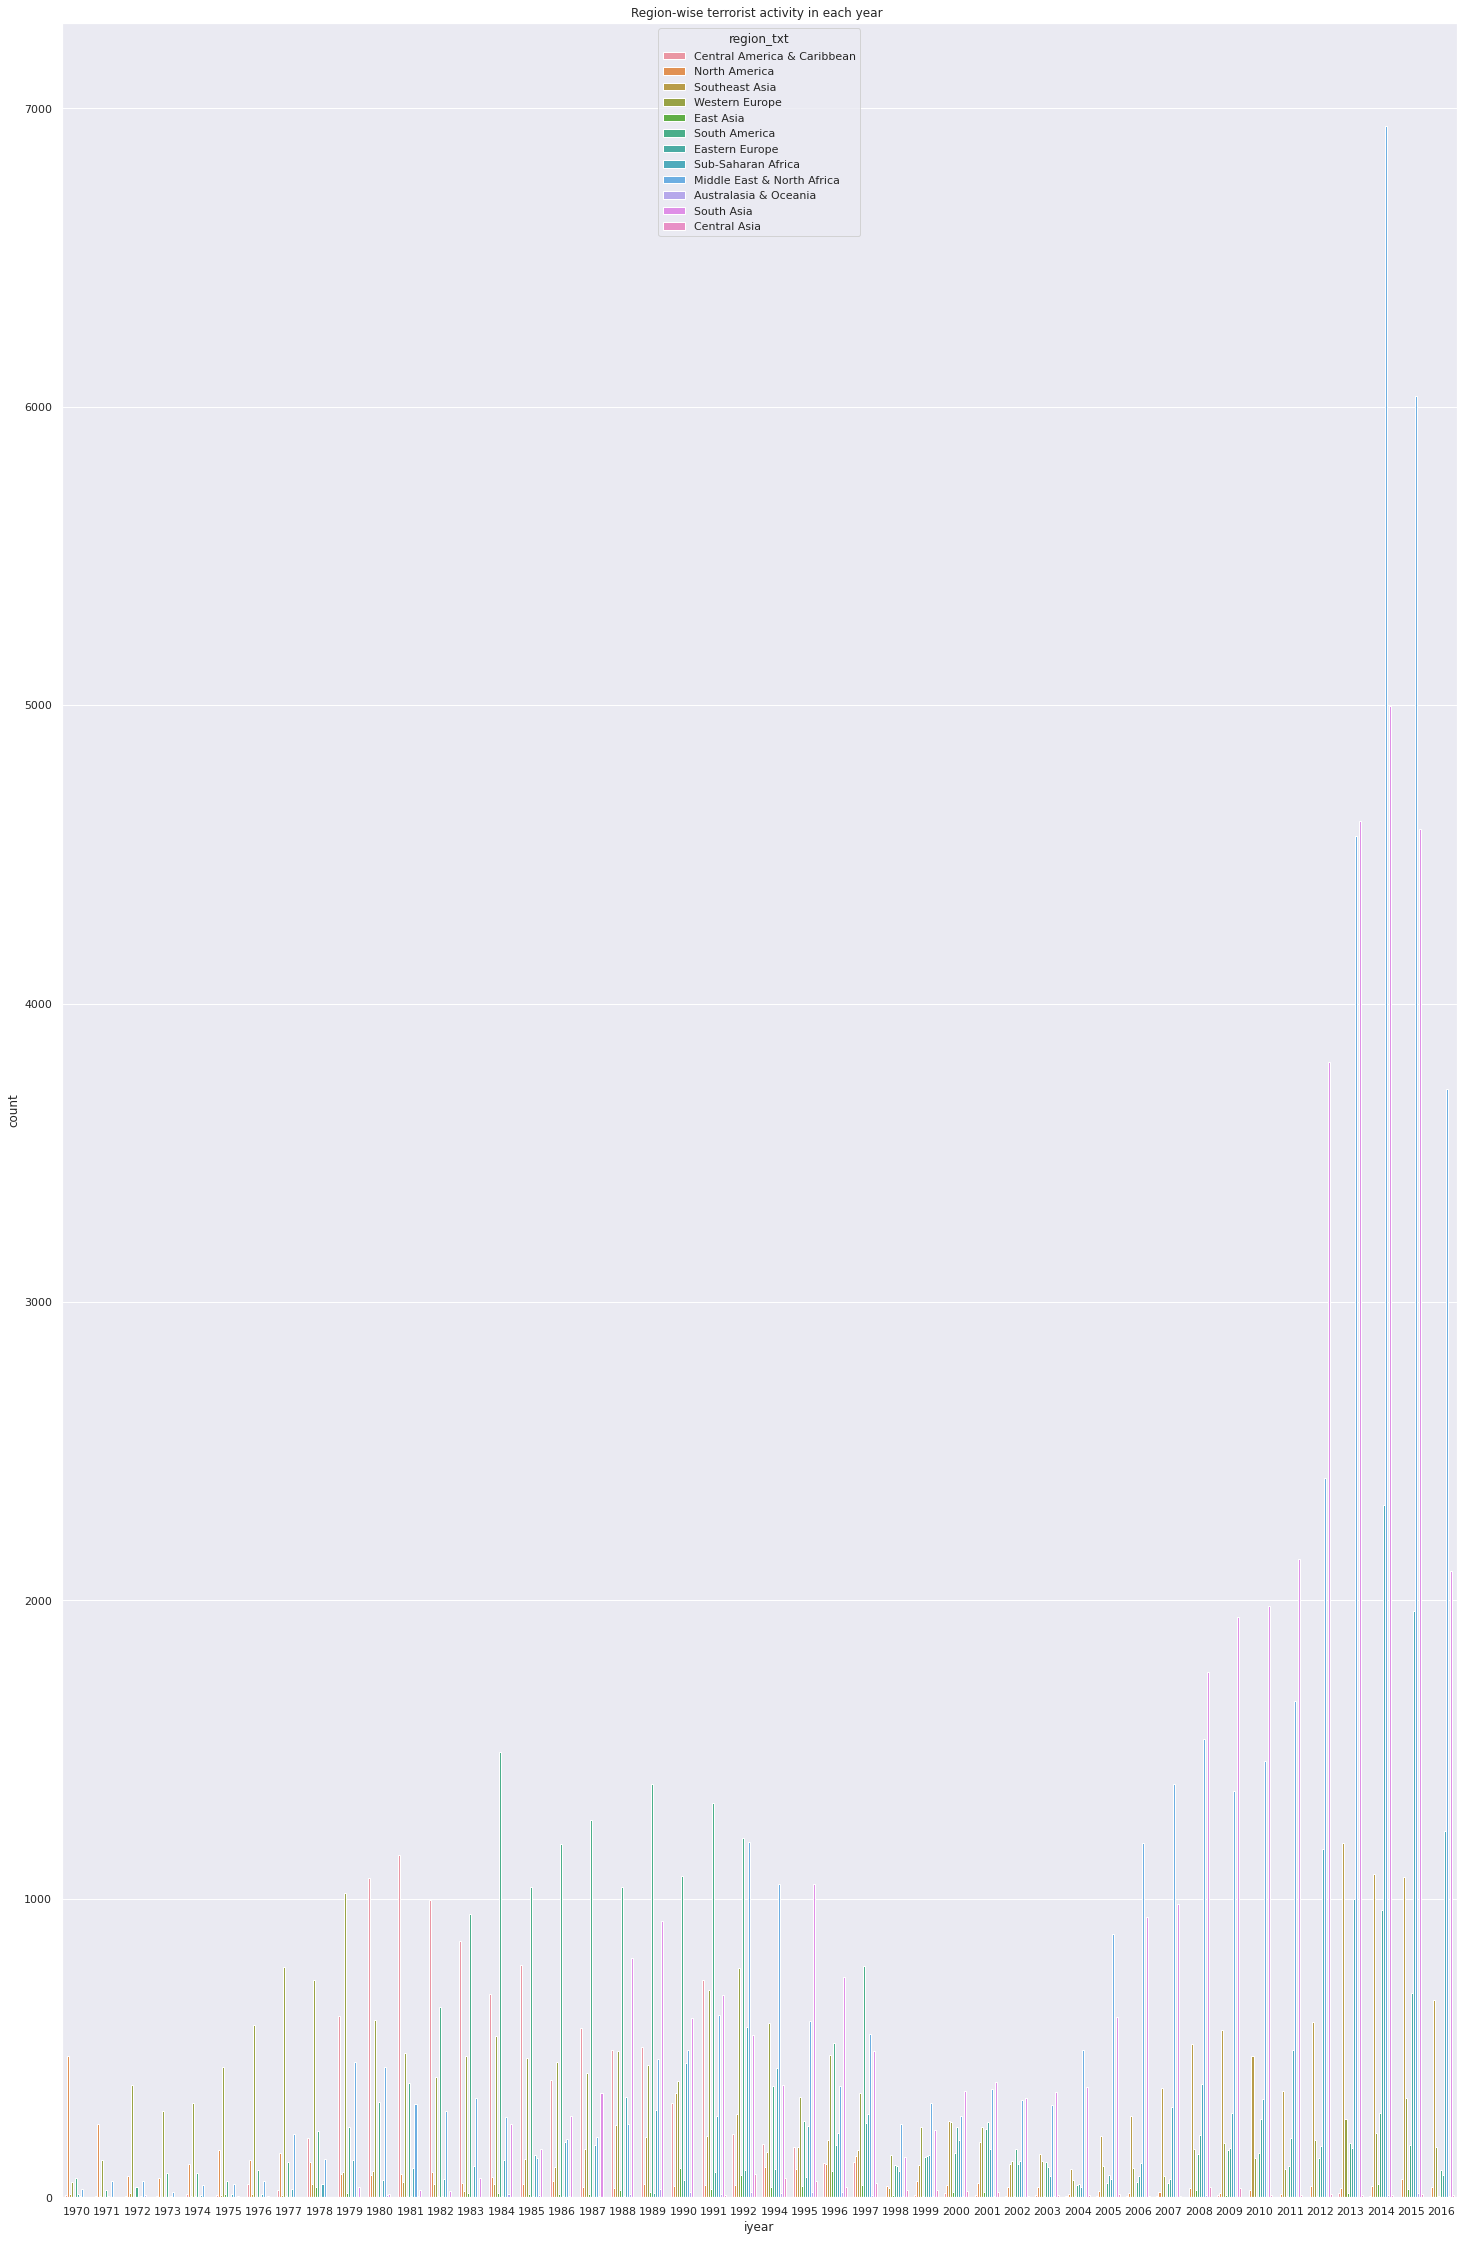

In [25]:
#region wise terrorist activities in every year

sns.set(rc={'figure.figsize':(25,40)})
sns.countplot(x=df['iyear'], hue=df['region_txt'])
plt.title('Region-wise terrorist activity in each year ')

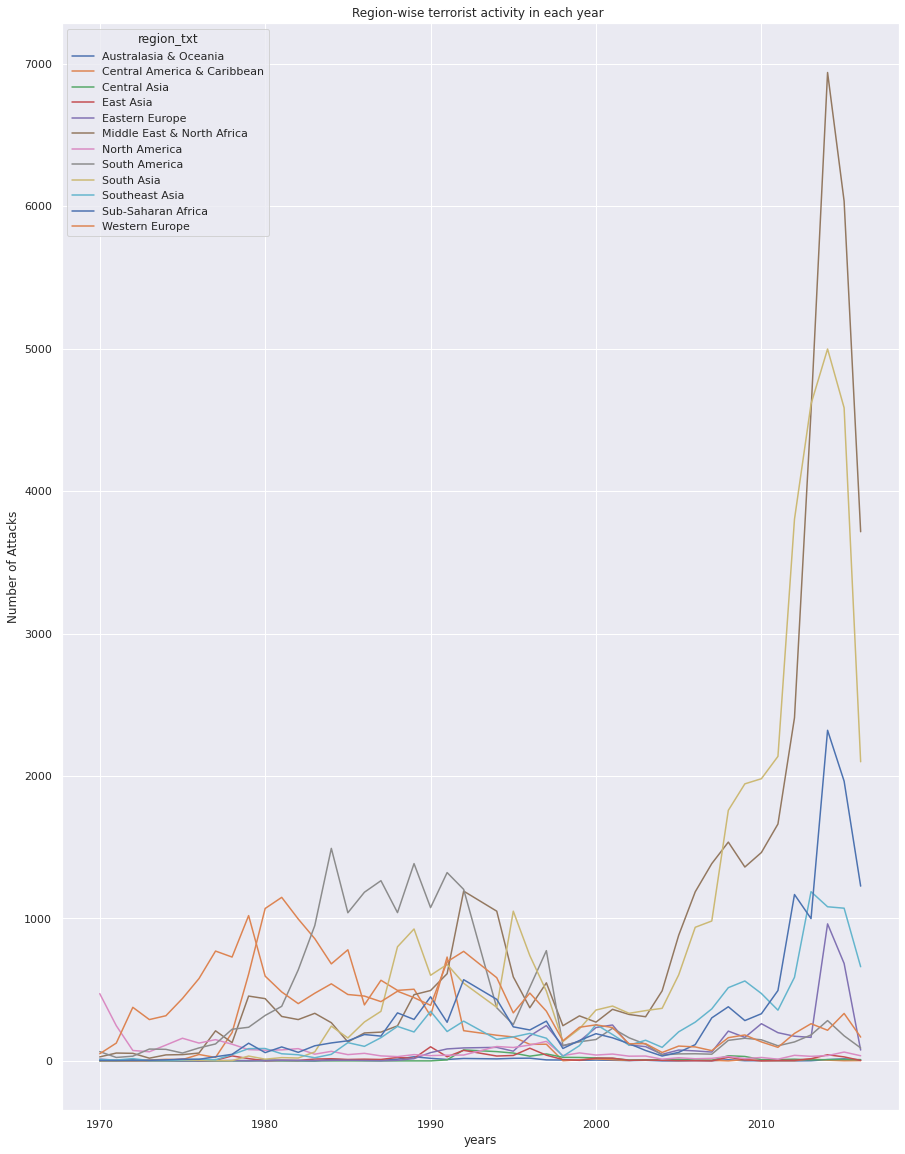

Middle east & North Africa has been reported to have more incidents


In [26]:
# A more graph for better understanding region wise terrorist attacks in each year
# or you can use pd.crosstab(df.iyear,df.region_txt)
pd.crosstab(df['iyear'],df['region_txt']).plot(kind='line',figsize=(15,20))
plt.title('Region-wise terrorist activity in each year ')
plt.ylabel('Number of Attacks')
plt.xlabel('years')
plt.show()

print('Middle east & North Africa has been reported to have more incidents')

In [27]:
#most effected region

df.value_counts('region_txt')

region_txt
Middle East & North Africa     44294
South Asia                     40005
South America                  18738
Western Europe                 16242
Sub-Saharan Africa             14730
Southeast Asia                 11049
Central America & Caribbean    10339
Eastern Europe                  4976
North America                   3320
East Asia                        790
Central Asia                     548
Australasia & Oceania            266
dtype: int64

In [30]:
# most effected countries

df.value_counts('country_txt')

country_txt
Iraq                   20848
Pakistan               13283
Afghanistan            10639
India                  10542
Colombia                8144
                       ...  
Antigua and Barbuda        1
St. Lucia                  1
Andorra                    1
North Korea                1
Falkland Islands           1
Length: 205, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


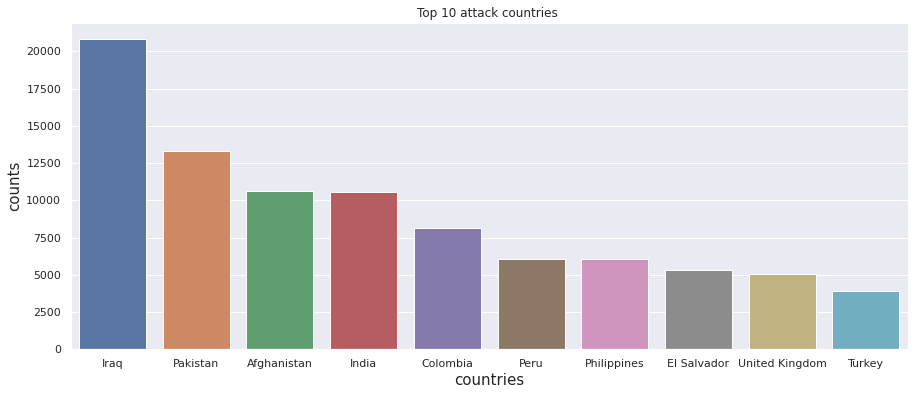

Most effected country is Iraq & mostly belongs to Asia continent


In [33]:
#top attack countries

plt.figure(figsize=(15,6))
sns.barplot(df['country_txt'].value_counts()[:10].index,df['country_txt'].value_counts()[:10].values)
plt.title('Top 10 attack countries ')
plt.ylabel('counts',fontsize=15)
plt.xlabel('countries',fontsize=15)
plt.show()
print('Most effected country is Iraq & mostly belongs to Asia continent')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


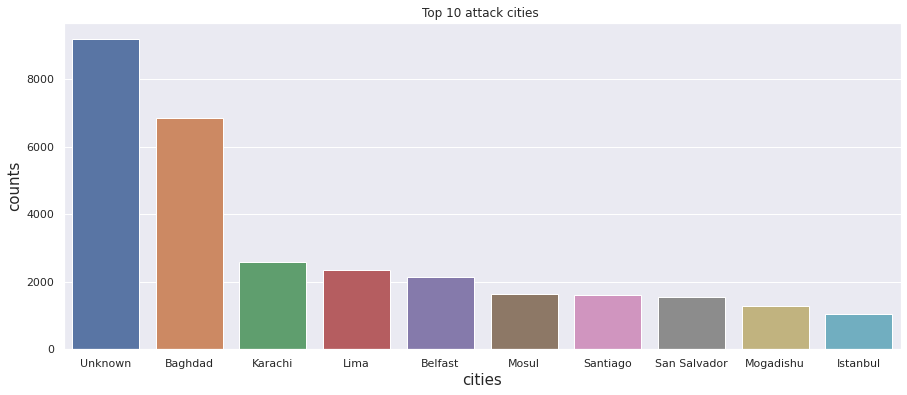

Most effected country is Unknown & baghdad


In [35]:
# top attack cities
plt.figure(figsize=(15,6))
sns.barplot(df['city'].value_counts()[:10].index,df['city'].value_counts()[:10].values)
plt.title('Top 10 attack cities ')
plt.ylabel('counts',fontsize=15)
plt.xlabel('cities',fontsize=15)
plt.show()
print('Most effected country is Unknown & baghdad')


Explosives, chemicals and Firearms are widely used as a weapon type


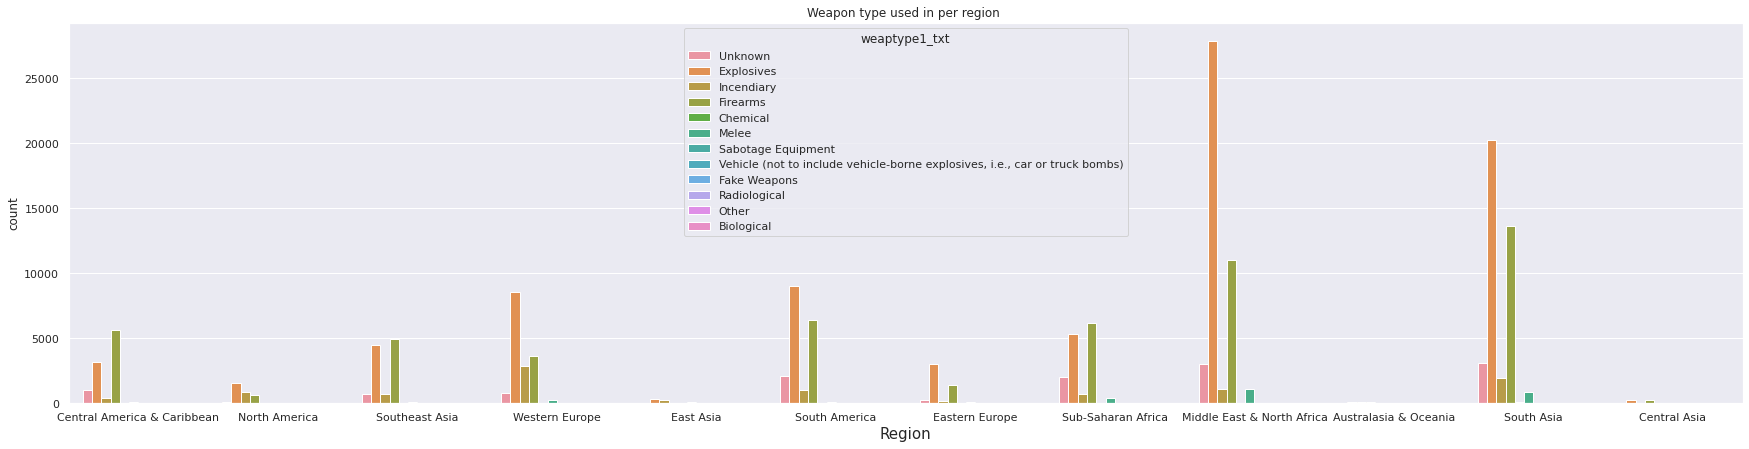

In [36]:
# weapon type in a particular region
sns.set(rc={'figure.figsize':(30,7)})
sns.countplot(x=df['region_txt'], hue=df['weaptype1_txt'])
plt.title('Weapon type used in per region ')
plt.xlabel('Region',fontsize=15)
print('Explosives, chemicals and Firearms are widely used as a weapon type')

Bombing/Explosion is highly used attack type and region is Middle East/North Africa


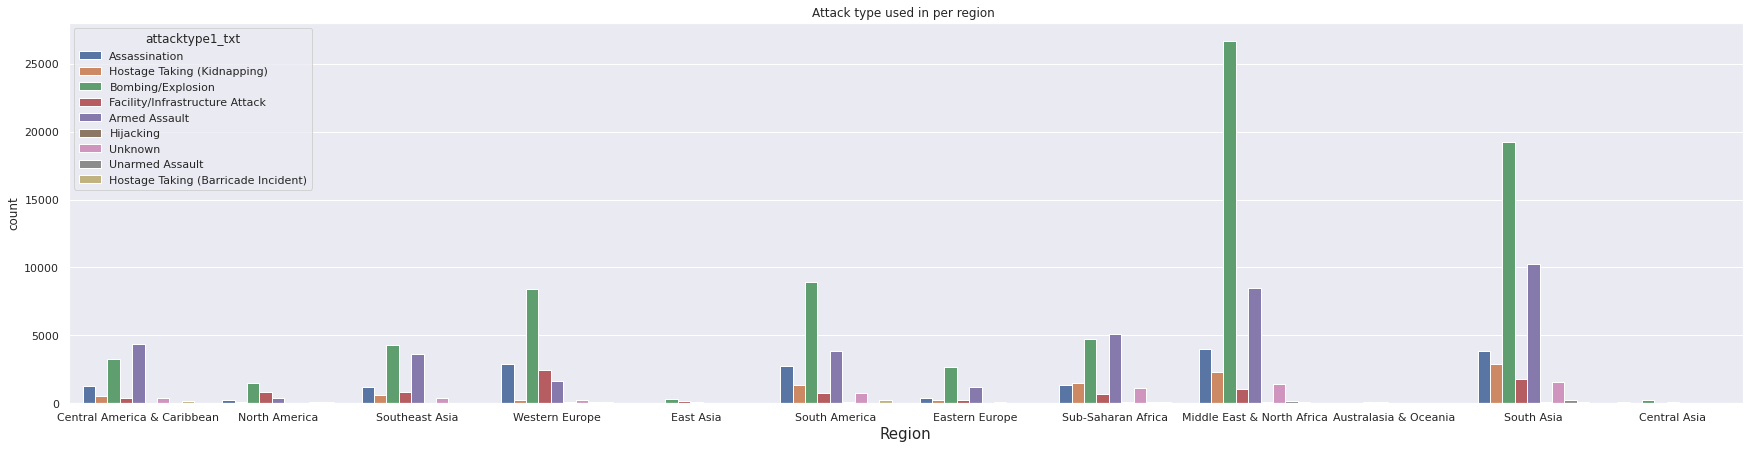

In [37]:
sns.set(rc={'figure.figsize':(30,7)})
sns.countplot(x=df['region_txt'], hue=df['attacktype1_txt'])
plt.title('Attack type used in per region ')
plt.xlabel('Region',fontsize=15)
print('Bombing/Explosion is highly used attack type and region is Middle East/North Africa')

Private Citizens/Property is the highly target type in each region


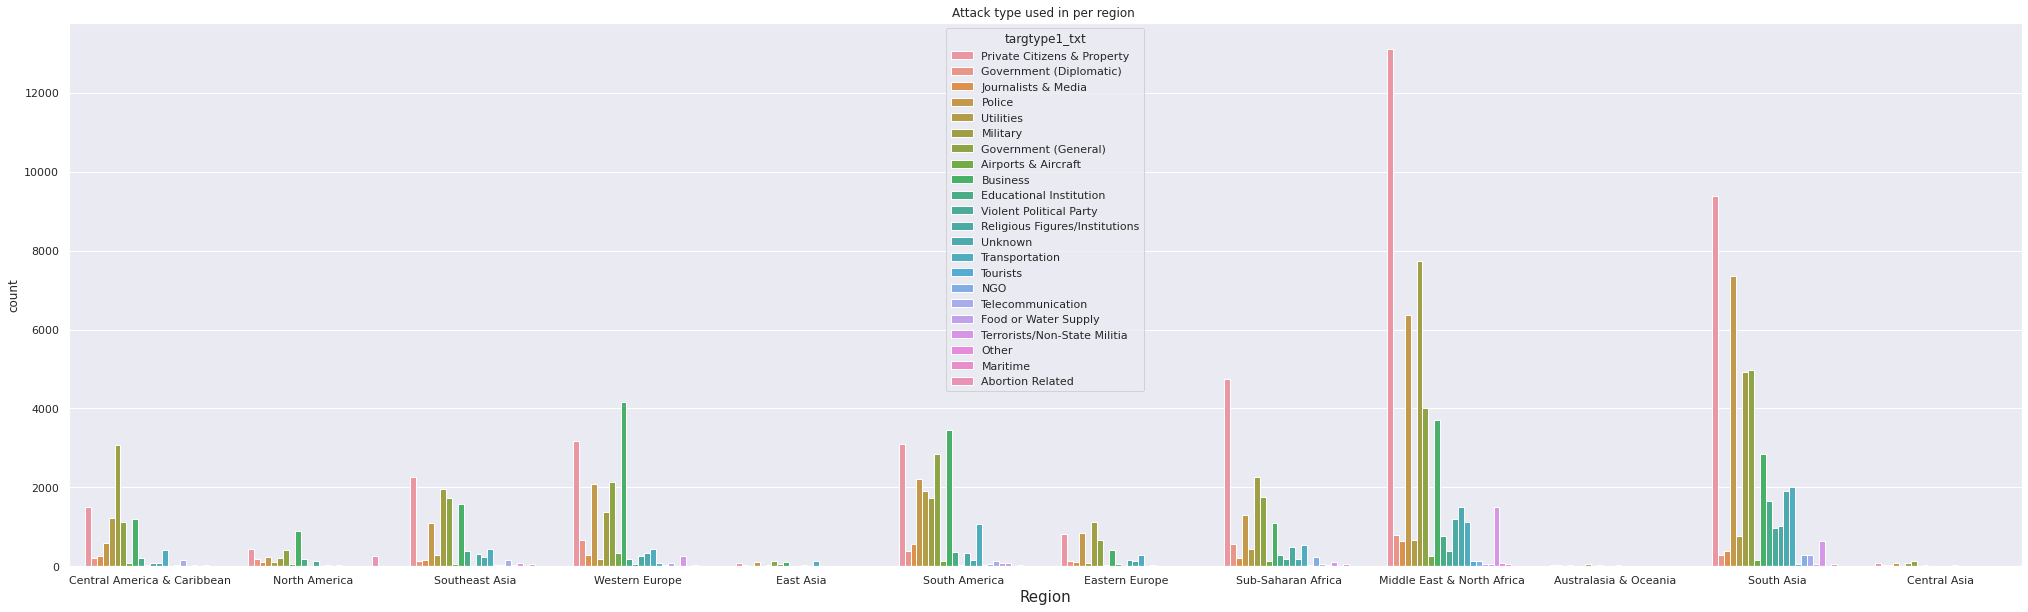

In [38]:
sns.set(rc={'figure.figsize':(35,10)})
sns.countplot(x=df['region_txt'], hue=df['targtype1_txt'])
plt.title('Attack type used in per region ')
plt.xlabel('Region',fontsize=15)
print('Private Citizens/Property is the highly target type in each region')

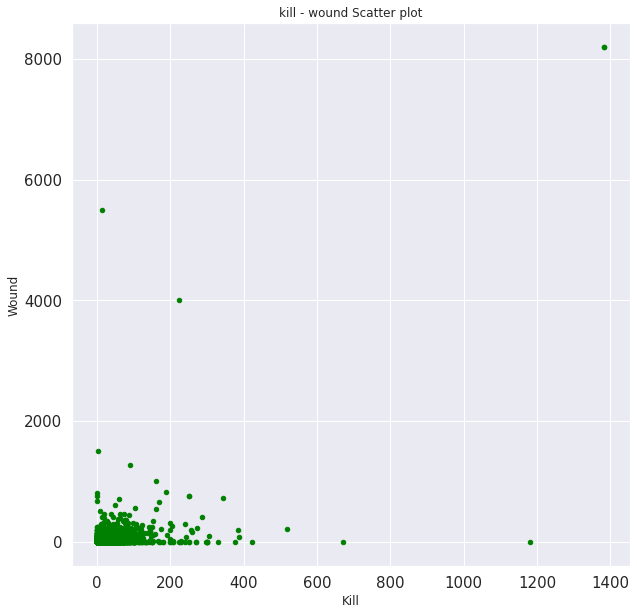

In [39]:
df.plot(kind='scatter',x='nkill',y='nwound',color='green',figsize=(10,10),fontsize=15)
plt.xlabel('Kill')
plt.ylabel('Wound')
plt.title('kill - wound Scatter plot')
plt.show()

Analysing the data of india

In [43]:
new=df[df['country_txt']=='India']['city']
new.value_counts()
#print('Most effected cities- srinagar')

Srinagar               624
Unknown                612
Imphal                 370
New Delhi              157
Amritsar               137
                      ... 
Kishanganj district      1
Ketar                    1
Sewai                    1
Kommalapudi              1
Kushipora                1
Name: city, Length: 4133, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


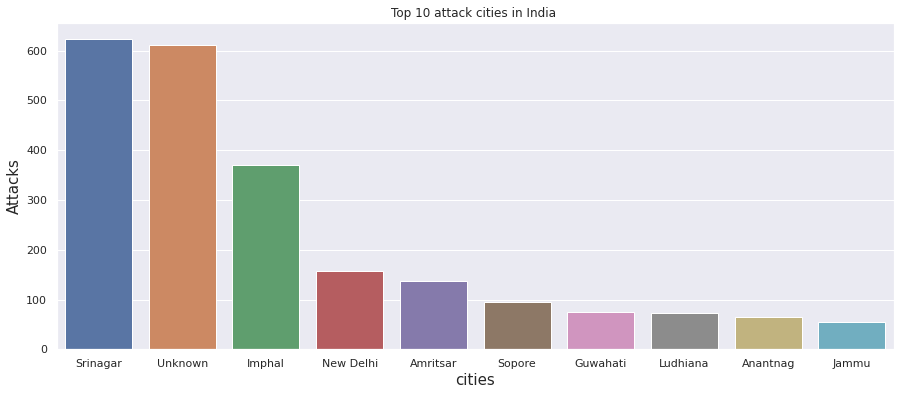

Most effected country is Unknown & Srinagar


In [46]:
#Top 10 cities of india by attack

plt.figure(figsize=(15,6))
sns.barplot(new.value_counts()[:10].index,new.value_counts()[:10].values)
plt.title('Top 10 attack cities in India ')
plt.ylabel('Attacks',fontsize=15)
plt.xlabel('cities',fontsize=15)
plt.show()
print('Most effected country is Unknown & Srinagar')

In [47]:
new=df[df['country_txt']=='India'][['city','iyear','attacktype1_txt','gname']]
new[:10]
# This is the top 10 location of india with attack details.

,city,iyear,attacktype1_txt,gname
1186,New Delhi,1972,Hijacking,Palestinians
2764,Samastipur,1975,Bombing/Explosion,Ananda Marga
3857,New Delhi,1976,Bombing/Explosion,Unknown
5327,Bombay,1977,Hijacking,Japanese Red Army (JRA)
7337,Unknown,1979,Armed Assault,Naga People
7342,Imphal,1979,Assassination,Unknown
8174,Unknown,1979,Armed Assault,Meitei extremists
8685,Unknown,1979,Assassination,Mizo National Front
8831,Unknown,1979,Armed Assault,Mizo National Front
8836,Aizawl,1979,Facility/Infrastructure Attack,Mizo National Front


In [48]:
df['iyear'].value_counts()[:10]

2014    16903
2015    14965
2013    12036
2012     8522
2016     8093
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
Name: iyear, dtype: int64

In [49]:
#top 10 terriorst groups 


df['gname'].value_counts()[:10]

Unknown                                             76098
Taliban                                              6113
Shining Path (SL)                                    4551
Islamic State of Iraq and the Levant (ISIL)          3661
Farabundo Marti National Liberation Front (FMLN)     3351
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2482
Al-Shabaab                                           2449
New People's Army (NPA)                              2385
Basque Fatherland and Freedom (ETA)                  2024
Name: gname, dtype: int64

In [50]:
new=df[df['country_txt']=='India']['iyear']
new.value_counts()
# This is the top terriorst attacks of india

2015    884
2014    860
2013    694
2009    672
2010    663
2011    645
2012    611
2016    573
2008    534
1988    358
1990    349
1991    339
1989    324
1992    237
2001    234
1996    213
2003    196
1997    193
2002    184
2000    180
1995    179
2006    167
1987    166
1984    159
2007    149
2005    146
1999    112
2004    108
1994    107
1986     96
1998     61
1983     47
1985     39
1979     20
1981     16
1982     13
1980     10
1977      1
1972      1
1975      1
1976      1
Name: iyear, dtype: int64

In [51]:
new=df[df['country_txt']=='India']['attacktype1_txt']
new.value_counts()

Bombing/Explosion                      4340
Armed Assault                          2867
Assassination                          1139
Hostage Taking (Kidnapping)            1023
Facility/Infrastructure Attack          723
Unknown                                 294
Unarmed Assault                          93
Hijacking                                38
Hostage Taking (Barricade Incident)      25
Name: attacktype1_txt, dtype: int64

#**Conclusion :**
1. Most attacks in Country - Iraq
2. Most attacks in City - Baghdad
3. Most attacks in Region - Middle East & North Africa
4. Least attacks in Region - Australasia & Oceania
5. Most attacks in year - 2014
6. Most attacks in Month - 5
7. Most attacks by Group - Taliban
8. Most attacks type - Bombing/Explsion
9. Most target type by terriorst - Private Citizens/Property
10. Most target Continent - Asia
11. Least attacks type - Hijecking
12. least attacks in year - 1971
**India:**
 1. Most effected state - J&K
 2. Most effected city - Sri Nagar
 3. Most terriorst group - CPI- Maoist
 4. Most effected yesr - 2016
 5. Least effected year - 1976,1977,1972,1975
 6. Most attack type - Bombing/Explosion
 7. Least attack type - Hijecking
